In [27]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import os

pd.set_option("display.max_columns", None)
np.random.seed(42)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

path_csv = "../data/data_horizons.csv"
path_csv_annotator_ids = '../data/Kartierer_ID.csv'
path_csv_locations = '../data/STANDORT.csv'
path_pictures = "/Users/felix/Library/CloudStorage/Dropbox/data/BGR-Data-Bodenhorizonte/Profilbilder/"
path_images = "images"
path_masks = "masks"

df = pd.read_csv(path_csv, sep=';').dropna(subset=['Bodenart'])
image_dataset = os.listdir(path_pictures)
img_files = pd.DataFrame(image_dataset, columns=['file'])
img_files['Point'] = img_files['file'].str.split("_")\
                            .map(lambda x: x[1]).astype(float)

df = pd.merge(df, img_files, how='inner', on='Point')
df['file'] = df['file'].map(lambda x: os.path.join(path_pictures, x))

df_k = pd.read_csv(path_csv_annotator_ids, sep=';')
df_k = df_k.rename({'PointID':'Point'},axis=1)
df_loc = pd.read_csv(path_csv_locations, sep=';')
df_loc = df_loc.rename({'PointID':'Point'},axis=1)

df = pd.merge(df, df_k, how='inner', on='Point')
df = pd.merge(df, df_loc, how='inner', on='Point')

keep_columns = ['Point', 
                'HorizontID', 
                'Obergrenze', 
                'Untergrenze', 
                'Horizontsymbol',
                'Bodenart', 
                'Bodenfarbe', 
                'Steine', 
                'Karbonat', 
                'Humusgehaltsklasse',
                'Durchwurzelung', 
                'max_depth', 
                'file', 
                'Aufnehmer', 
                'Probenahme_Monat',
                'Probenahme_Jahr', 
                'xcoord', 
                'ycoord', 
                'Bodenklimaraum_Name',
                'Landnutzung', 
                'BZE_Moor', 
                'Hauptbodentyp', 
                'BodenVarTypSub',
                'GrundwaStufe', 
                'GrundwaStand', 
                'Moormaechtigkeit', 
                'Torfmaechtigkeit',
                'Neigung', 
                'Exposition', 
                'Woelbung', 
                'Reliefformtyp', 
                'LageImRelief',
                'KV_0_30', 
                'KV_30_100']

df = df[keep_columns]
df

,Point,HorizontID,Obergrenze,Untergrenze,Horizontsymbol,Bodenart,Bodenfarbe,Steine,Karbonat,Humusgehaltsklasse,Durchwurzelung,max_depth,file,Aufnehmer,Probenahme_Monat,Probenahme_Jahr,xcoord,ycoord,Bodenklimaraum_Name,Landnutzung,BZE_Moor,Hauptbodentyp,BodenVarTypSub,GrundwaStufe,GrundwaStand,Moormaechtigkeit,Torfmaechtigkeit,Neigung,Exposition,Woelbung,Reliefformtyp,LageImRelief,KV_0_30,KV_30_100
0,2.0,1.0,0.0,28.0,I; Ap,Sl2,7.5YR 3/2,3.0,C0,h3,Wf4,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,"462216,1283","6079359,775",Marsch - Nord,A,0,YE,YE/BB,0,>200,0,0,N0,NaN,GG,V,Z,"81,89","54,19"
1,2.0,2.0,28.0,54.0,I; E,Sl2,10YR 3/3,3.0,C0,h2,Wf3,90.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,"462216,1283","6079359,775",Marsch - Nord,A,0,YE,YE/BB,0,>200,0,0,N0,NaN,GG,V,Z,"81,89","54,19"
2,2.0,3.0,54.0,68.0,II; Bv,Sl2,7.5YR 4/3,10.0,C0,h1,Wf3,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,"462216,1283","6079359,775",Marsch - Nord,A,0,YE,YE/BB,0,>200,0,0,N0,NaN,GG,V,Z,"81,89","54,19"
3,2.0,4.0,68.0,96.0,III; Bv-ilCv,fSms,7.5YR 6/4,1.0,C0,h0,Wf2,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,"462216,1283","6079359,775",Marsch - Nord,A,0,YE,YE/BB,0,>200,0,0,N0,NaN,GG,V,Z,"81,89","54,19"
4,2.0,5.0,96.0,201.0,III; ilCv,mSfs,10YR 7/4,1.0,C0,h0,NaN,100.0,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,11,2015,"462216,1283","6079359,775",Marsch - Nord,A,0,YE,YE/BB,0,>200,0,0,N0,NaN,GG,V,Z,"81,89","54,19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13332,6211.0,3.0,27.0,50.0,I; Bbh+Bs,fSms,5YR 3/2,1.0,C0,h2,Wf3,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,"522076,9633","5930456,114",Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110,0,0,N0,NaN,GG,TSF,T,"117,59","87,72"
13333,6211.0,4.0,50.0,70.0,I; Bbs+Bs,fSms,5YR 4/3,1.0,C0,h1,Wf2,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,"522076,9633","5930456,114",Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110,0,0,N0,NaN,GG,TSF,T,"117,59","87,72"
13334,6211.0,5.0,70.0,100.0,I; Go-Bbs,fSms,7.5YR 5/4,1.0,C0,h1,Wf6,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,"522076,9633","5930456,114",Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110,0,0,N0,NaN,GG,TSF,T,"117,59","87,72"
13335,6211.0,6.0,100.0,130.0,I; Go,fSms,2.5Y 6/4,1.0,C0,h0,Wf4,NaN,/Users/felix/Library/CloudStorage/Dropbox/data...,Kart8,6,2012,"522076,9633","5930456,114",Elbe-Weser-Dreieck / sandige Böden,G,0,PP,GG-PP,GWS4,110,0,0,N0,NaN,GG,TSF,T,"117,59","87,72"


In [109]:
counts = df['Horizontsymbol'].str.split(';').map(lambda x: x[1]).value_counts()

In [110]:
counts[:30]

Horizontsymbol
Ap         1310
Bv          528
ilCv        482
Ah          427
rAp         407
elCv        358
Gr          357
Sd          276
Go          236
Ap2         225
Ap1         225
Swd         220
M           200
Bt          197
Sw          177
Gor         168
eAp         113
elC         113
Sw-Bv        97
lCv          97
Sdw          94
Bv-ilCv      89
aGr          88
Al           85
rGo          84
aGo          81
Bv-Sw        80
Gro          79
R-Ap         75
eSd          74
Name: count, dtype: int64

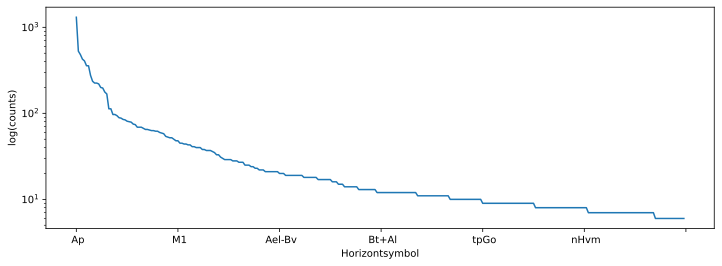

In [114]:
plt.figure(figsize=(12,4))
counts[:300].plot(logy=True);
plt.ylabel('log(counts)');
